This notebook builds a convolutional neural network that recognizes handwritten digits (0-9) with >98% accuracy.

## 1. Setup Environment

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## 2. Load and Explore Dataset
We'll use the classic MNIST dataset of 70,000 handwritten digits:

In [7]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Explore dataset
print("\nDataset shapes:")
print("Training images:", X_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test.shape)


Dataset shapes:
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


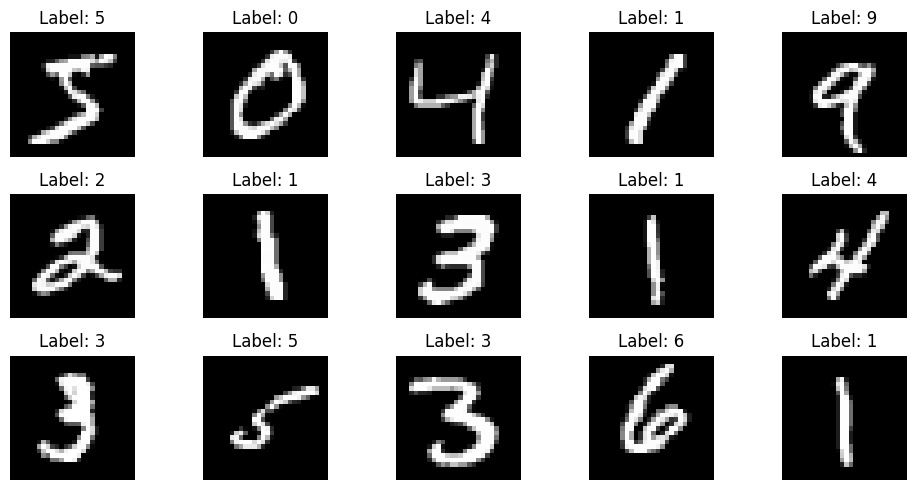

In [8]:
# Show sample images
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Preprocess Data
Prepare images for the neural network:

In [9]:
# Normalize pixel values (0-255 -> 0.0-1.0)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN input (28x28x1 instead of 28x28)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("\nNew shapes:")
print("Training images:", X_train.shape)
print("Test images:", X_test.shape)


New shapes:
Training images: (60000, 28, 28, 1)
Test images: (10000, 28, 28, 1)


## 4. Build CNN Model
Create a convolutional neural network architecture:

In [10]:
model = tf.keras.Sequential([
    # Feature extraction layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Classification layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

In [12]:
# Train model
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_split=0.2,  # 20% for validation
                    batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9897 - val_loss: 0.0415
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9905 - val_loss: 0.0384
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9863 - val_loss: 0.0516
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9976 - loss: 0.0073 - val_accuracy: 0.9899 - val_loss: 0.0414


6. Evaluate Performance
Check accuracy and visualize results:

In [13]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9884 - loss: 0.0418

Test accuracy: 0.9913


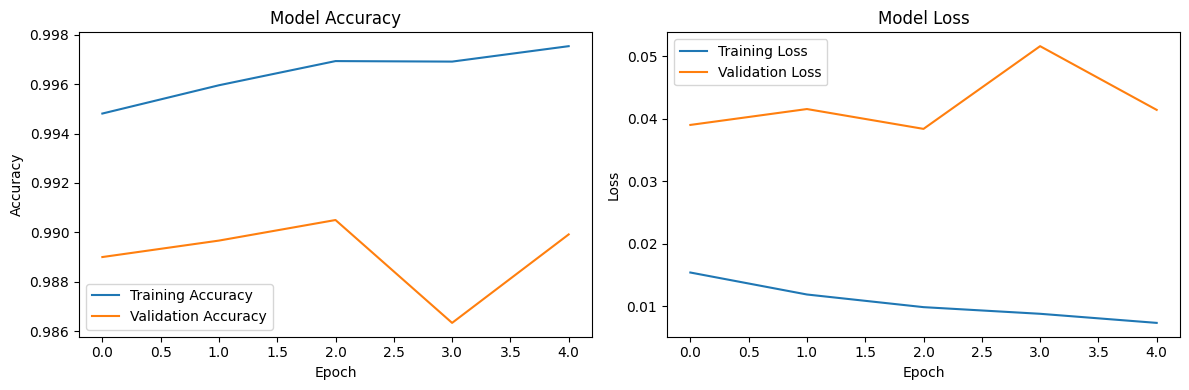

In [17]:
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

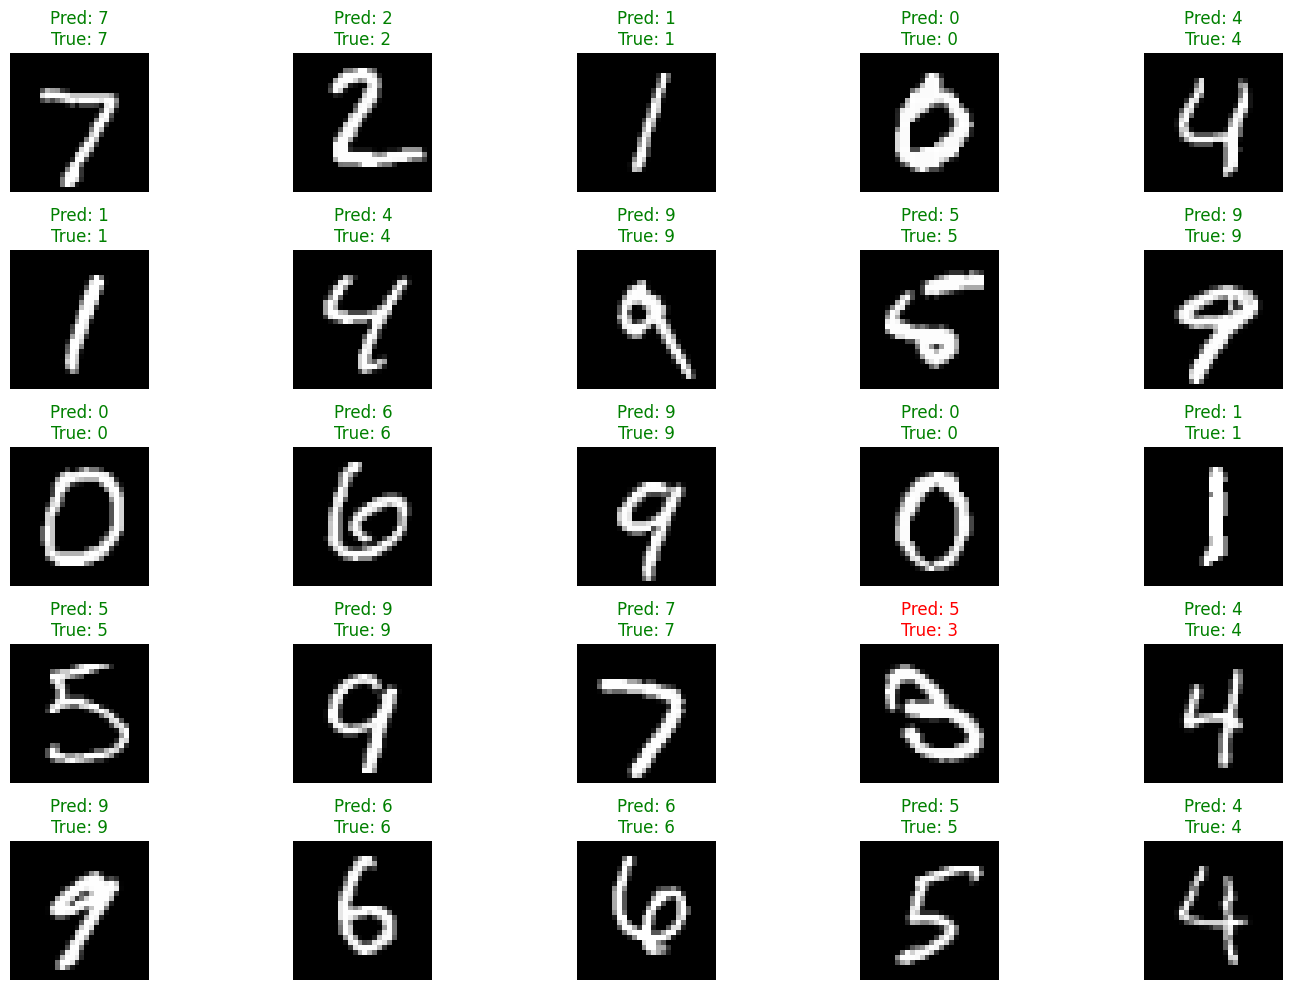

In [18]:
# Show sample predictions
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')

    # Get model prediction
    prediction = model.predict(tf.expand_dims(X_test[i], 0), verbose=0)
    pred_label = np.argmax(prediction)

    # Check if correct
    color = 'green' if pred_label == y_test[i] else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {y_test[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()